In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('bread basket.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [82]:
# date_time format
df['date_time'] = pd.to_datetime(df['date_time'], format = '%d-%m-%Y %H:%M')
df['date_time'].dtype

dtype('<M8[ns]')

In [83]:
# split date_time into month, day, hour
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.weekday
df['hour'] = df['date_time'].dt.hour
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


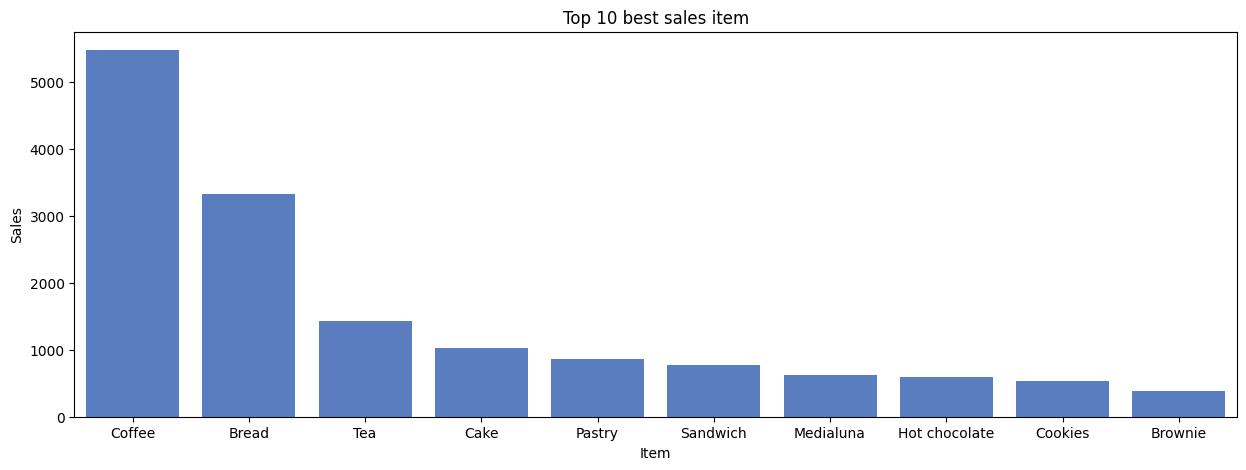

In [84]:
# top 10 best sales item
plt.figure(figsize=(15,5))
sns.set_palette('muted')
sns.barplot(x = df['Item'].value_counts()[:10].index,
            y = df['Item'].value_counts()[:10].values)
plt.xlabel('Item')
plt.ylabel('Sales')
plt.title('Top 10 best sales item')
plt.show()

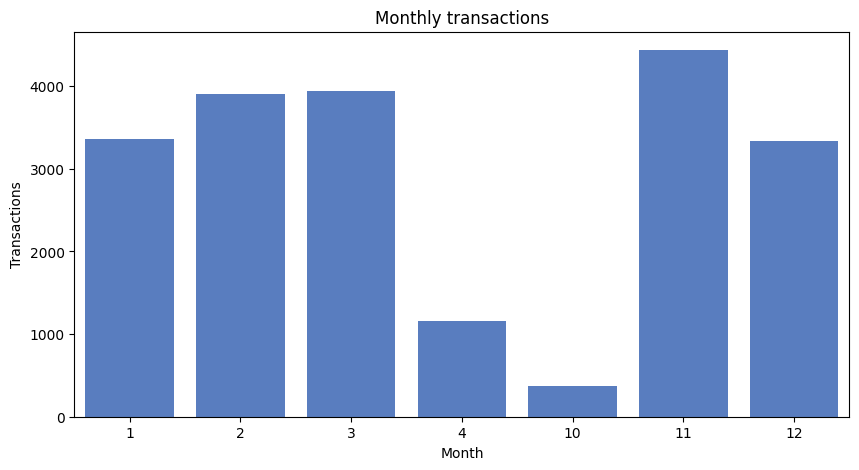

In [85]:
# monthly transactions
monthly_data = df.groupby('month')['Transaction'].count()
plt.figure(figsize=(10,5))
sns.barplot(x = monthly_data.index,
            y = monthly_data.values)
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.title('Monthly transactions')
plt.show()

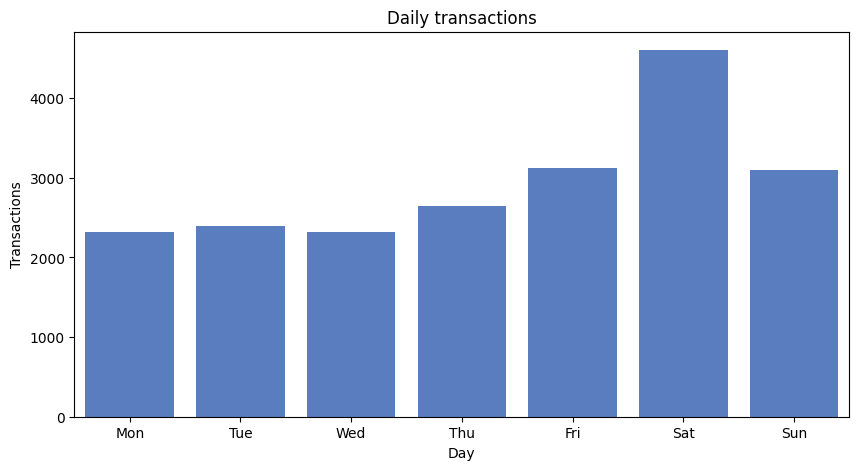

In [86]:
# daily transactions
daily_data = df.groupby('day')['Transaction'].count()
plt.figure(figsize=(10,5))
sns.barplot(x = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            y = daily_data.values)
plt.xlabel('Day')
plt.ylabel('Transactions')
plt.title('Daily transactions')
plt.show()

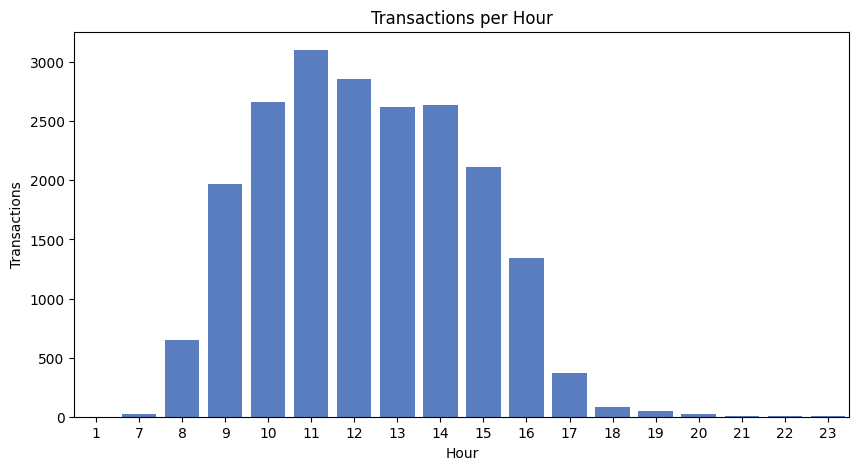

In [87]:
# transactions per hour
hourly_data = df.groupby('hour')['Transaction'].count()
plt.figure(figsize=(10,5))
sns.barplot(x = hourly_data.index,
            y = hourly_data.values)
plt.xlabel('Hour')
plt.ylabel('Transactions')
plt.title('Transactions per Hour')
plt.show()

In [88]:
# data preparation
df['Item'] = df['Item'].apply(lambda item: item.lower())
df['Item'] = df['Item'].apply(lambda item: item.strip())

In [89]:
item_df = df[['Transaction', 'Item']].copy()
item_df.head()

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam


In [90]:
# import apriori association rule
from mlxtend.frequent_patterns import association_rules, apriori

In [91]:
item_count = item_df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Count')
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [92]:
# pivot table
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print(item_count_pivot.shape)
item_count_pivot.head()

(9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# one hot encoding
one_hot_df = item_count_pivot.map(lambda x: 1 if x > 0 else 0)
one_hot_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# apriori algorithm
support = 0.01
frequent_items = apriori(one_hot_df, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

c:\Users\neozh\Downloads\Projects\bread-apriori\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [95]:
# association rule
metric = 'lift'
min_threshold = 1
rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.sort_values('confidence', ascending=False).head(15)

,antecedents,consequents,support,confidence,lift
31,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
22,(pastry),(coffee),0.047544,0.552147,1.154168
1,(alfajores),(coffee),0.019651,0.540698,1.130235
16,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723
